In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# pip install noisereduce
# pip install soundfile



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv("audio_analysis_results_50.csv")

In [4]:
df

,file_id,transcription,duration
0,102-129232-0000,AND SHAKSPEARE'S STRAIN ONE HISTORY THERE IS O...,15.240
1,102-129232-0001,HE THAT IS ONCE ADMITTED TO THE RIGHT OF REASO...,14.610
2,102-129232-0002,FOR THIS IS THE ONLY AND SOVEREIGN AGENT OF TH...,14.725
3,102-129232-0003,MAN IS EXPLICABLE BY NOTHING LESS THAN ALL HIS...,14.100
4,102-129232-0004,EVERY THOUGHT EVERY EMOTION WHICH BELONGS TO I...,11.045
...,...,...,...
6514,94-3795-0019,AND WALKED AWAY WITH SUCH A LOOK OF SADNESS ON...,15.230
6515,94-3795-0020,WHO WAS RECOUNTING SOMETHING WITH GREAT ANIMAT...,13.845
6516,94-3795-0021,HE WAS SAYING THAT IT SEEMED WONDERFUL HOW THE...,14.100
6517,94-3795-0022,THE ADVOCATE IS A GENIUS HE SAID THE LISTENERS...,14.065


In [15]:
df.describe()


,duration,transcription_length,duration_scaled
count,6519.000000,6519.000000,6.519000e+03
mean,11.383392,157.752569,5.231792e-17
std,4.325983,66.308476,1.000077e+00
min,1.235000,2.000000,-2.346096e+00
25%,8.042500,108.000000,-7.723442e-01
50%,13.190000,171.000000,4.176500e-01
75%,14.890000,209.000000,8.106544e-01
max,17.340000,313.000000,1.377043e+00


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("missing values\n",missing_values)

# Check for duplicate entries
duplicate_entries = df.duplicated().sum()
print("\nduplicate_entries",duplicate_entries)

# Validate uniqueness of file identifiers
unique_file_ids = df['file_id'].nunique()
total_entries = df.shape[0]

print("\nuniqueness",unique_file_ids,total_entries)

missing values
 file_id          0
transcription    0
duration         0
dtype: int64

duplicate_entries 0

uniqueness 6519 6519


In [6]:
# Calculate the length of each transcription
df['transcription_length'] = df['transcription'].apply(len)

# Basic statistics for the transcription length column
transcription_length_stats = df['transcription_length'].describe()

df

,file_id,transcription,duration,transcription_length
0,102-129232-0000,AND SHAKSPEARE'S STRAIN ONE HISTORY THERE IS O...,15.240,139
1,102-129232-0001,HE THAT IS ONCE ADMITTED TO THE RIGHT OF REASO...,14.610,155
2,102-129232-0002,FOR THIS IS THE ONLY AND SOVEREIGN AGENT OF TH...,14.725,143
3,102-129232-0003,MAN IS EXPLICABLE BY NOTHING LESS THAN ALL HIS...,14.100,152
4,102-129232-0004,EVERY THOUGHT EVERY EMOTION WHICH BELONGS TO I...,11.045,113
...,...,...,...,...
6514,94-3795-0019,AND WALKED AWAY WITH SUCH A LOOK OF SADNESS ON...,15.230,222
6515,94-3795-0020,WHO WAS RECOUNTING SOMETHING WITH GREAT ANIMAT...,13.845,205
6516,94-3795-0021,HE WAS SAYING THAT IT SEEMED WONDERFUL HOW THE...,14.100,219
6517,94-3795-0022,THE ADVOCATE IS A GENIUS HE SAID THE LISTENERS...,14.065,190


In [16]:
transcription_length_stats

count    6519.000000
mean      157.752569
std        66.308476
min         2.000000
25%       108.000000
50%       171.000000
75%       209.000000
max       313.000000
Name: transcription_length, dtype: float64

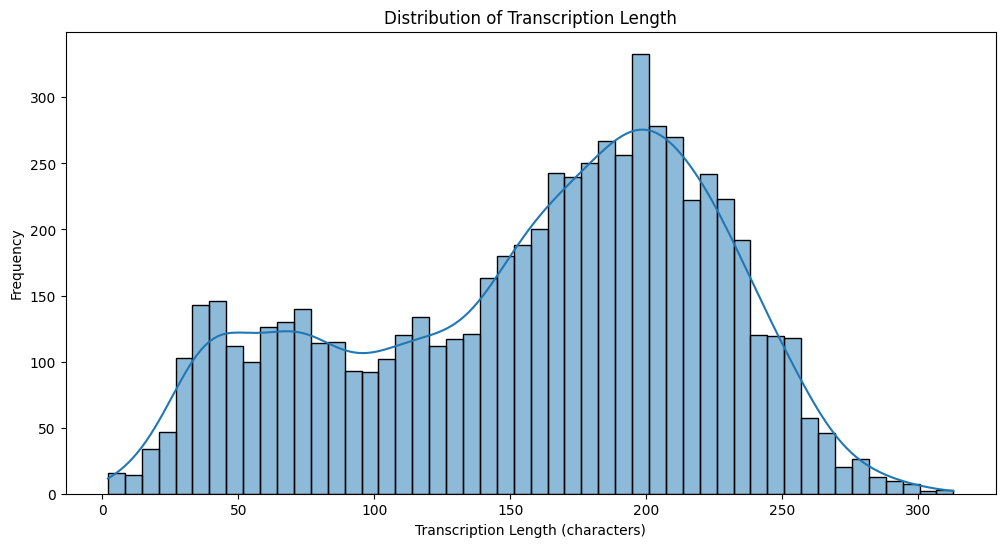

In [7]:
# Plot the distribution of the transcription length column
plt.figure(figsize=(12, 6))
sns.histplot(df['transcription_length'], bins=50, kde=True)
plt.title('Distribution of Transcription Length')
plt.xlabel('Transcription Length (characters)')
plt.ylabel('Frequency')
plt.show()

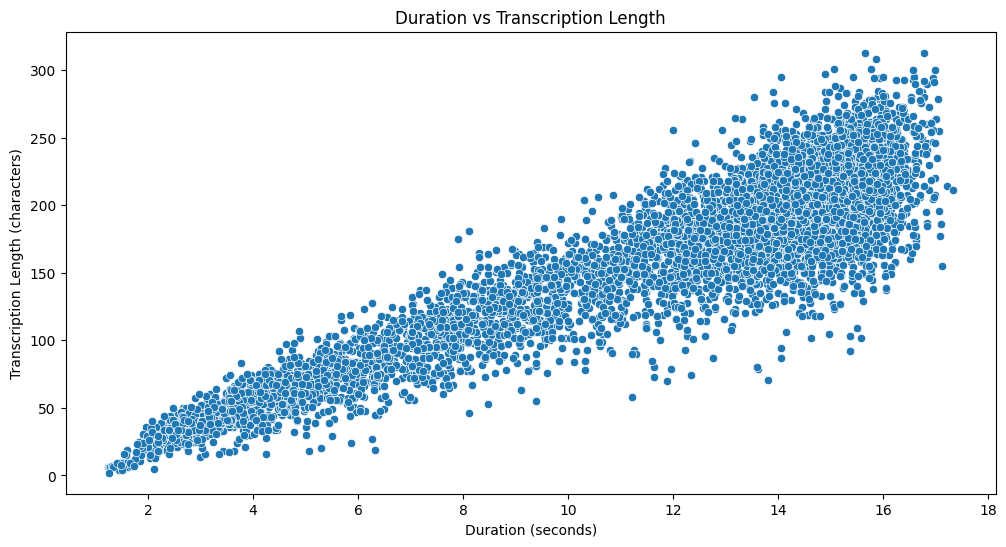

In [8]:
# Scatter plot to explore the relationship between duration and transcription length
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration', y='transcription_length', data=df)
plt.title('Duration vs Transcription Length')
plt.xlabel('Duration (seconds)')
plt.ylabel('Transcription Length (characters)')
plt.show()


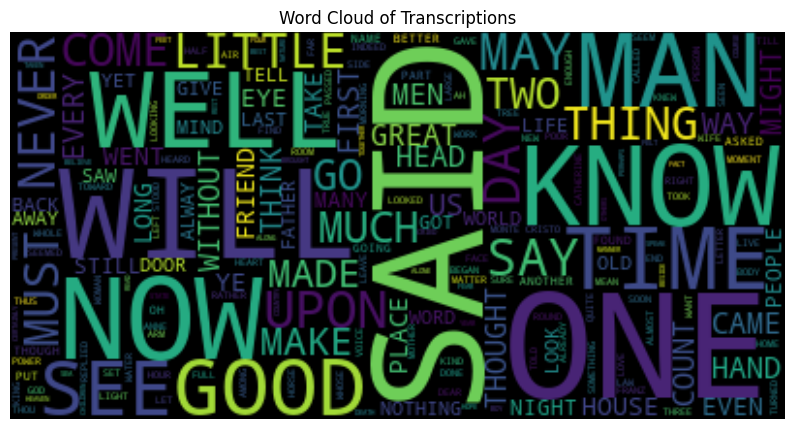

In [17]:
from wordcloud import WordCloud

# Join all transcriptions into a single text
text = ' '.join(df['transcription'])

# Generate and plot the word cloud
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Transcriptions')
plt.show()

In [9]:

# Initialize the scaler
scaler = StandardScaler()

# Scale the duration column
df['duration_scaled'] = scaler.fit_transform(df[['duration']])
print(df)

              file_id                                      transcription  \
0     102-129232-0000  AND SHAKSPEARE'S STRAIN ONE HISTORY THERE IS O...   
1     102-129232-0001  HE THAT IS ONCE ADMITTED TO THE RIGHT OF REASO...   
2     102-129232-0002  FOR THIS IS THE ONLY AND SOVEREIGN AGENT OF TH...   
3     102-129232-0003  MAN IS EXPLICABLE BY NOTHING LESS THAN ALL HIS...   
4     102-129232-0004  EVERY THOUGHT EVERY EMOTION WHICH BELONGS TO I...   
...               ...                                                ...   
6514     94-3795-0019  AND WALKED AWAY WITH SUCH A LOOK OF SADNESS ON...   
6515     94-3795-0020  WHO WAS RECOUNTING SOMETHING WITH GREAT ANIMAT...   
6516     94-3795-0021  HE WAS SAYING THAT IT SEEMED WONDERFUL HOW THE...   
6517     94-3795-0022  THE ADVOCATE IS A GENIUS HE SAID THE LISTENERS...   
6518     94-3795-0023  THOUGH NEKHLUDOFF HAD ARRIVED LATE HE HAD TO W...   

      duration  transcription_length  duration_scaled  
0       15.240                 

In [10]:
# Cleaning Audio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Pre Processing

In [14]:
from pydub import AudioSegment, effects
import librosa
import noisereduce as nr
import os
import soundfile as sf


# Function to load and clean an audio file
def clean_audio(file_path, output_path, target_sr=16000):
    # Load audio file
    audio = AudioSegment.from_file(file_path)
    print(audio)
    # Normalize volume
    normalized_audio = effects.normalize(audio)
    
    # Trim silence
    trimmed_audio = normalized_audio.strip_silence(silence_thresh=normalized_audio.dBFS-16)
    
    # Export to temporary WAV file for further processing
    temp_file = "temp.wav"
    trimmed_audio.export(temp_file, format="wav")
    
    # Load the trimmed audio with librosa for noise reduction and resampling
    y, sr = librosa.load(temp_file, sr=None)
    
    # Perform noise reduction
    reduced_noise = nr.reduce_noise(y=y, sr=sr)
    
    # Resample audio to target sampling rate
    resampled_audio = librosa.resample(reduced_noise, orig_sr=sr, target_sr=target_sr)
    
    # Save the cleaned and resampled audio file
    sf.write(output_path, resampled_audio, target_sr)

    # librosa.output.write_wav(output_path, resampled_audio, target_sr)
    
    # Remove temporary file
    os.remove(temp_file)


# Define input and output directories
input_base_dir = "D:\sts\others\data"
output_base_dir = 'cleaned_audios'

# Create the output base directory if it doesn't exist
os.makedirs(output_base_dir, exist_ok=True)

# Walk through the directory tree
for root, dirs, files in os.walk(input_base_dir):
    for filename in files:
        if filename.endswith(".flac"):
            print(filename)
            # Create the corresponding output directory
            relative_path = os.path.relpath(root, input_base_dir)
            output_dir = os.path.join(output_base_dir, relative_path)
            os.makedirs(output_dir, exist_ok=True)
            
            # Define input and output file paths
            input_file = os.path.join(root, filename)
            output_file = os.path.join(output_dir, filename.replace('.flac', '.wav'))  # Change extension to .wav
            
            # Clean the audio file
            clean_audio(input_file, output_file)
            print(f"Processed {input_file} -> {output_file}")

102-129232-0000.flac
Processed D:\sts\others\data\102\129232\102-129232-0000.flac -> cleaned_audios\102\129232\102-129232-0000.wav
102-129232-0001.flac
Processed D:\sts\others\data\102\129232\102-129232-0001.flac -> cleaned_audios\102\129232\102-129232-0001.wav
102-129232-0002.flac
Processed D:\sts\others\data\102\129232\102-129232-0002.flac -> cleaned_audios\102\129232\102-129232-0002.wav
102-129232-0003.flac
Processed D:\sts\others\data\102\129232\102-129232-0003.flac -> cleaned_audios\102\129232\102-129232-0003.wav
102-129232-0004.flac
Processed D:\sts\others\data\102\129232\102-129232-0004.flac -> cleaned_audios\102\129232\102-129232-0004.wav
102-129232-0005.flac
Processed D:\sts\others\data\102\129232\102-129232-0005.flac -> cleaned_audios\102\129232\102-129232-0005.wav
102-129232-0006.flac
Processed D:\sts\others\data\102\129232\102-129232-0006.flac -> cleaned_audios\102\129232\102-129232-0006.wav
102-129232-0007.flac
Processed D:\sts\others\data\102\129232\102-129232-0007.flac -

In [13]:
# Define a function to parse the SPEAKERS.TXT file
def parse_speakers_file(filepath):
    speaker_details = []
    with open(filepath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if not line.startswith(';') and '|' in line:
                parts = line.strip().split('|')
                if len(parts) == 5:
                    speaker_id, gender, subset, duration, name = [part.strip() for part in parts]
                    speaker_details.append({
                        'speaker_id': int(speaker_id),
                        'gender': gender,
                        'name': name
                    })
    return pd.DataFrame(speaker_details)

# Parse the speakers file
speakers_filepath = "D:\sts\temp\SPEAKERS.TXT"
speaker_details = parse_speakers_file(speakers_filepath)

# Display the first few rows of the speaker details
print(speaker_details.head())

# Assuming the file_id in the current dataset maps to the speaker_id in the speakers file
# Add a speaker_id column to the current dataset by extracting it from file_id
df['speaker_id'] = df['file_id'].apply(lambda x: int(x.split('-')[0]))

# Merge the datasets
merged_dataset = pd.merge(df, speaker_details, on='speaker_id', how='left')

# Display the first few rows of the merged dataset
print(merged_dataset.head())

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('path_to_save_merged_dataset.csv', index=False)



OSError: [Errno 22] Invalid argument: 'D:\\sts\temp\\SPEAKERS.TXT'